In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving DP.csv to DP (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['DP.csv']))
print(df)


          Date  Level  rainfall  Humidity  Tempreature
0    01-Jun-20   6.00     21.74     19.41        25.69
1    02-Jun-20   7.32     29.47     18.92        25.54
2    03-Jun-20   7.50     15.75     19.23        25.50
3    04-Jun-20   7.48     14.63     18.74        25.25
4    05-Jun-20   7.44      6.17     18.19        25.59
..         ...    ...       ...       ...          ...
807  27-Oct-18   3.90      0.00     14.95        24.01
808  28-Oct-18   3.87      0.00     13.85        23.47
809  29-Oct-18   3.85      0.00     13.55        22.94
810  30-Oct-18   3.75      0.00     13.49        22.73
811  31-Oct-18   3.74      0.00     15.08        23.60

[812 rows x 5 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-65-daf096e1202c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

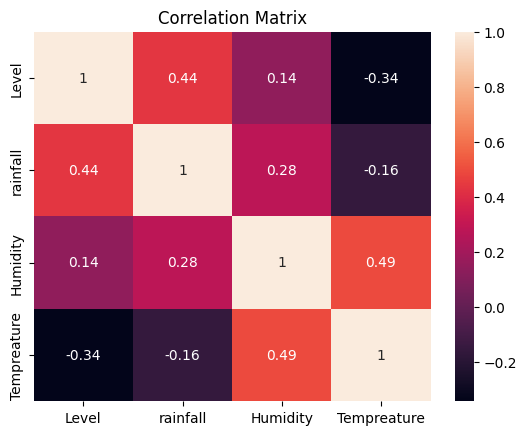

In [ ]:
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

In [ ]:
df.describe()

,Level,rainfall,Humidity,Tempreature
count,812.000000,812.000000,812.000000,812.000000
mean,8.109175,13.833485,17.776342,24.550283
std,2.093830,15.345481,0.842916,1.149157
min,2.490000,0.000000,13.490000,22.170000
25%,6.257500,4.017500,17.330000,23.840000
50%,8.435000,8.975000,17.820000,24.235000
75%,9.362500,17.955000,18.310000,24.962500
max,18.240000,138.580000,20.080000,30.210000


In [ ]:
df.head()

,Date,Level,rainfall,Humidity,Tempreature
0,01-Jun-20,6.00,21.74,19.41,25.69
1,02-Jun-20,7.32,29.47,18.92,25.54
2,03-Jun-20,7.50,15.75,19.23,25.50
3,04-Jun-20,7.48,14.63,18.74,25.25
4,05-Jun-20,7.44,6.17,18.19,25.59


In [ ]:
X = df[['Humidity','Tempreature','rainfall']]
y = df['Level']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [ ]:
from sklearn.preprocessing import MinMaxScalar
scaler=MinMaxScalar()
scaler.fit(X_train,X_test)


ImportError: ignored

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =200)


Epoch 1/200
17/17 [==============================] - 1s 17ms/step - loss: 67.8629 - mae: 8.0717 - val_loss: 56.3983 - val_mae: 7.2724
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 47.7345 - mae: 6.6303 - val_loss: 34.1909 - val_mae: 5.4784
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 25.6108 - mae: 4.5884 - val_loss: 14.8070 - val_mae: 3.3847
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 12.1497 - mae: 2.9680 - val_loss: 8.4169 - val_mae: 2.3796
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 8.4489 - mae: 2.3582 - val_loss: 5.9896 - val_mae: 1.9949
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 6.0636 - mae: 1.9971 - val_loss: 4.6593 - val_mae: 1.7338
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 4.7734 - mae: 1.7643 - val_loss: 4.0741 - val_mae: 1.6097
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 3.

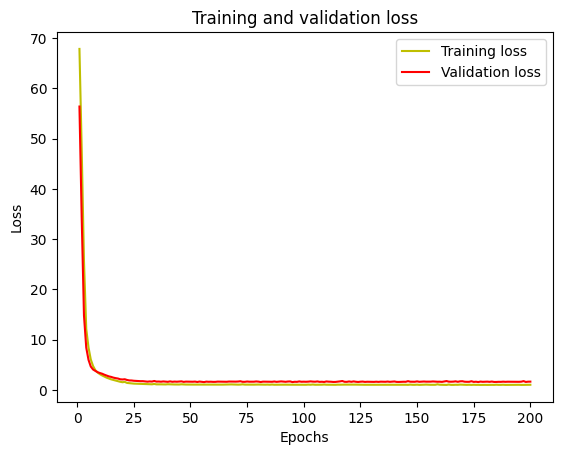

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

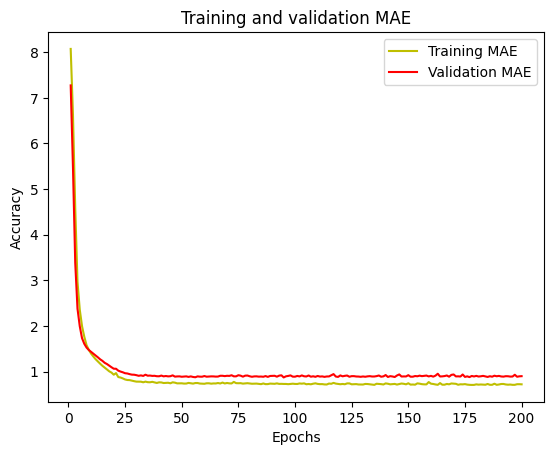

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test_scaled)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)

6/6 [==============================] - 0s 2ms/step
Predicted values are:  [[ 8.807056 ]
 [ 8.578174 ]
 [ 8.830685 ]
 [ 9.517389 ]
 [ 8.399188 ]
 [11.15032  ]
 [ 7.567783 ]
 [ 9.013275 ]
 [ 8.909823 ]
 [ 8.750851 ]
 [ 5.942888 ]
 [ 9.132508 ]
 [ 8.020959 ]
 [ 9.672546 ]
 [ 8.878639 ]
 [ 6.9474607]
 [ 8.8156805]
 [ 9.657443 ]
 [ 7.7621713]
 [ 8.867104 ]
 [ 9.703857 ]
 [ 9.003436 ]
 [ 8.712242 ]
 [ 8.680885 ]
 [ 9.051587 ]
 [11.184572 ]
 [ 8.527613 ]
 [ 8.866081 ]
 [ 8.447149 ]
 [ 8.621862 ]
 [ 7.4258113]
 [ 8.073901 ]
 [ 6.6868677]
 [ 6.6470823]
 [ 6.7661886]
 [14.319525 ]
 [10.28199  ]
 [12.025578 ]
 [ 7.006655 ]
 [ 9.46912  ]
 [ 8.864135 ]
 [ 6.197525 ]
 [ 8.949172 ]
 [ 9.0555725]
 [ 6.3427672]
 [ 8.27895  ]
 [ 6.9362097]
 [ 8.873437 ]
 [ 6.0930924]
 [ 8.438648 ]
 [ 8.682747 ]
 [ 8.663923 ]
 [ 8.59297  ]
 [ 8.6213455]
 [ 8.511843 ]
 [10.568902 ]
 [ 8.388117 ]
 [ 8.416434 ]
 [ 7.855103 ]
 [ 6.7741613]
 [ 8.603665 ]
 [ 9.255719 ]
 [ 6.1336627]
 [ 8.678428 ]
 [ 7.3040686]
 [ 8.776924 ]
 [

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y_test,predictions)
print("R-squared:", r_squared)

R-squared: 0.4855937755930756


In [ ]:
from sklearn.metrics import r2_score

# assuming you have your actual and predicted outputs in y_actual and y_pred variables
r2 = r2_score(y_test,predictions)

print("R-squared:", r2)

R-squared: 0.4855937755930756


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

6/6 [==============================] - 0s 9ms/step - loss: 2.0202 - mae: 0.8867
Mean squared error from neural net:  2.0202178955078125
Mean absolute error from neural net:  0.8867006897926331


In [ ]:
# Predictions
preds = model.predict(X_test_scaled)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
302,9.15,8.6340,0.5160
62,8.68,9.4050,-0.7250
811,7.25,9.1055,-1.8555
616,8.79,9.3500,-0.5600
359,8.74,8.1455,0.5945
...,...,...,...
53,9.56,8.6505,0.9095
24,7.06,6.1845,0.8755
226,8.67,8.1870,0.4830
211,7.92,8.2060,-0.2860


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)
r_squared = r2_score(y_test,y_pred_lr)
print("R-squared:", r_squared)


Mean squared error from linear regression:  2.4292124505909936
Mean absolute error from linear regression:  1.0851947806346516
R-squared: 0.3814517520718489


In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)
r_squared = r2_score(y_test,y_pred_tree)
print("R-squared:", r_squared)


Mean squared error using decision tree:  3.6241135019263884
Mean absolute error using decision tree:  1.2482822104294478
R-squared: 0.07719513936957145


In [ ]:
##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 20, random_state=20)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)
r_squared = r2_score(y_test,y_pred_RF)
print("R-squared:", r_squared)


Mean squared error using Random Forest:  2.2029151856807427
Mean absolute error Using Random Forest:  0.9315337462576687
R-squared: 0.4390736272961069


In [ ]:
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Tempreature    0.536701
rainfall       0.308833
Humidity       0.154466
dtype: float64


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=6).fit(X_train_scaled, y_train)


In [ ]:
y_pred_KNN = knn_model.predict(X_test_scaled)

mse_KNN = mean_squared_error(y_test, y_pred_KNN)
mae_KNN = mean_absolute_error(y_test, y_pred_KNN)
print('Mean squared error using KNN: ', mse_KNN)
print('Mean absolute error Using KNN: ', mae_KNN)
r_squared = r2_score(y_test,y_pred_KNN)
print("R-squared:", r_squared)

Mean squared error using KNN:  2.212908875949564
Mean absolute error Using KNN:  0.9901840517382414
R-squared: 0.4365289426578357


In [ ]:
from sklearn import metrics

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

RMSE: 1.487584913861916


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred_SVM = regressor.predict(X_test_scaled)

mse_SVM = mean_squared_error(y_test, y_pred_SVM)
mae_SVM = mean_absolute_error(y_test, y_pred_SVM)
print('Mean squared error using SVM: ', mse_SVM)
print('Mean absolute error Using SVM: ', mae_SVM)
r_squared = r2_score(y_test,y_pred_SVM)
print("R-squared:", r_squared)

Mean squared error using SVM:  2.1651900030872246
Mean absolute error Using SVM:  0.9298081335878357
R-squared: 0.44867955764209744


In [ ]:
from sklearn.metrics import r2_score

# assuming you have your actual and predicted outputs in y_actual and y_pred variables
r2 = r2_score(y_test, y_pred_SVM)

print("R-squa:", r2)

R-squa: 0.44867955764209744


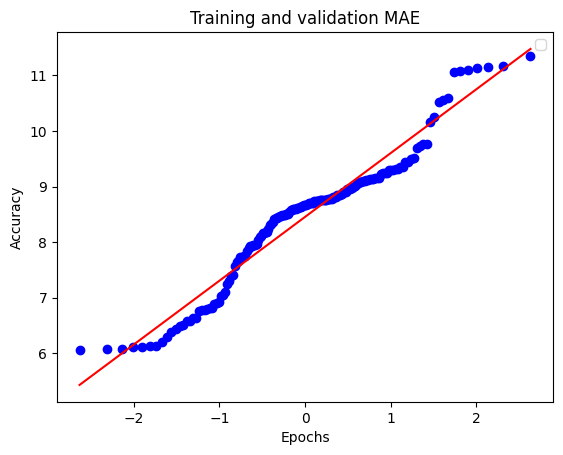

In [ ]:
from scipy.stats import probplot
#QQ Plot
probplot(y_pred_SVM, dist='norm', plot=plt);
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()